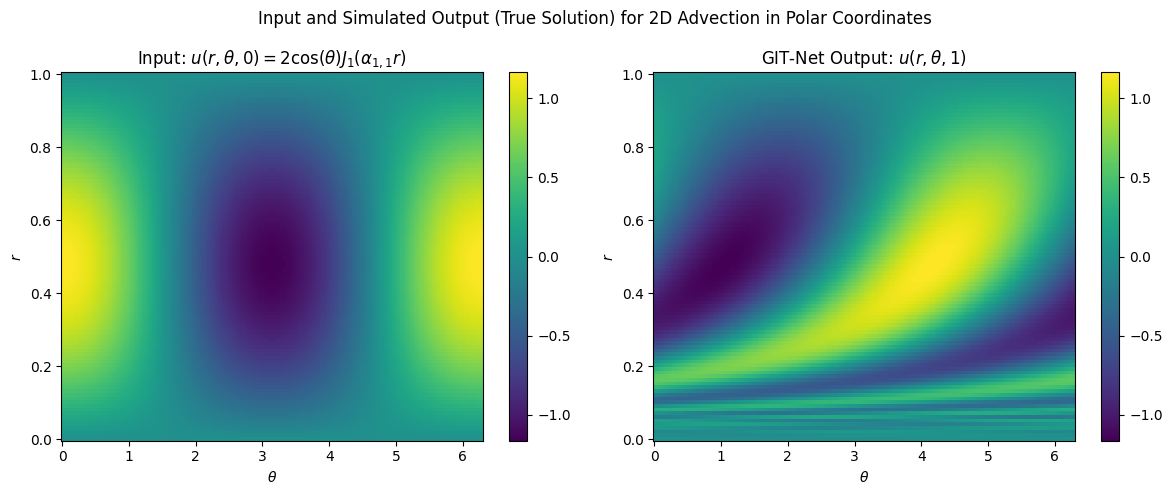

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1

# Parameters
Nr = 100
Ntheta = 200
Nt = 10
c = 1.0
alpha = 3.8317  # First zero of J1

# Discretize domain
r = np.linspace(1e-3, 1.0, Nr)  # Avoid r=0
theta = np.linspace(0, 2*np.pi, Ntheta)
R, Theta = np.meshgrid(r, theta, indexing='ij')
omega = c / R

# Initial condition
def u_initial(R, Theta):
    return 2 * np.cos(Theta) * j1(alpha * R)

# Simulated GIT-Net output (true solution at t=1.0 for now)
def u_output(R, Theta, t):
    Theta_shifted = Theta + omega * t
    return 2 * np.cos(Theta_shifted) * j1(alpha * R)

# Compute input and output fields
u0 = u_initial(R, Theta)
t_pred = 1.0
u_pred = u_output(R, Theta, t_pred)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Input: u(r, theta, 0)
im0 = axs[0].pcolormesh(theta, r, u0, shading='auto', cmap='viridis')
axs[0].set_title(r'Input: $u(r,\theta,0) = 2 \cos(\theta) J_1(\alpha_{1,1} r)$')
axs[0].set_xlabel(r'$\theta$')
axs[0].set_ylabel(r'$r$')
plt.colorbar(im0, ax=axs[0], orientation='vertical')

# Output: Predicted u(r, theta, t)
im1 = axs[1].pcolormesh(theta, r, u_pred, shading='auto', cmap='viridis')
axs[1].set_title(r'GIT-Net Output: $u(r,\theta,1)$')
axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$r$')
plt.colorbar(im1, ax=axs[1], orientation='vertical')

plt.suptitle("Input and Simulated Output (True Solution) for 2D Advection in Polar Coordinates")
plt.tight_layout()
plt.show()
